IMPORT MODELS

In [ ]:
!pip install scikit-learn xgboost tensorflow matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


IMPORT DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIDS Adherence /Share AIDS_ClinicalTrial_GroupStudy175.csv")

DATA CLEANING

In [ ]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [ ]:
df.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,...,0,1,0,1,0,911,930,885,526,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [ ]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [ ]:
df.shape

(2139, 24)

In [ ]:
df.size

51336

In [ ]:
df.isnull().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [ ]:
df.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

In [ ]:
# Feature Derivation
# Calculate CD4/CD8 ratios
df['cd4_cd8_ratio'] = df['cd40'] / df['cd80']
df['cd4_change'] = df['cd420'] - df['cd40']
df['cd8_change'] = df['cd820'] - df['cd80']

In [ ]:
# Combine comorbidities and opportunistic prior infections into a score
df['comorbidity_score'] = df['homo'] + df['oprior']

In [ ]:
# Example: Adding age groups (binning)
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

<ipython-input-14-f9fb3cee8285>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_counts = df.groupby('age_group')['label'].count()


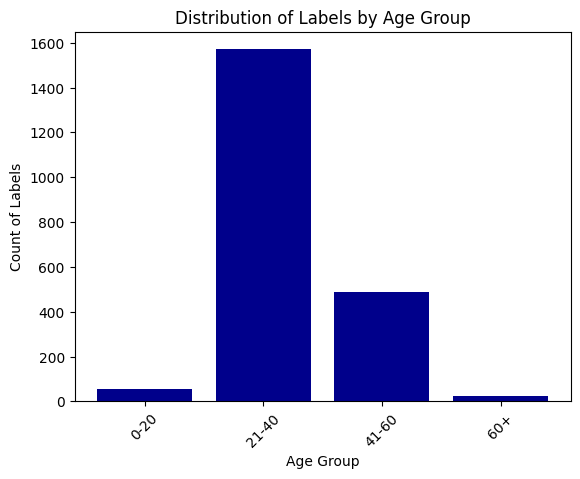

In [ ]:
label_counts = df.groupby('age_group')['label'].count()

# Create the horizontal bar plot
plt.bar(label_counts.index, label_counts.values, color= ['darkblue'])
plt.xlabel("Age Group")
plt.ylabel("Count of Labels")
plt.title("Distribution of Labels by Age Group")
plt.xticks(rotation=45)
plt.show()


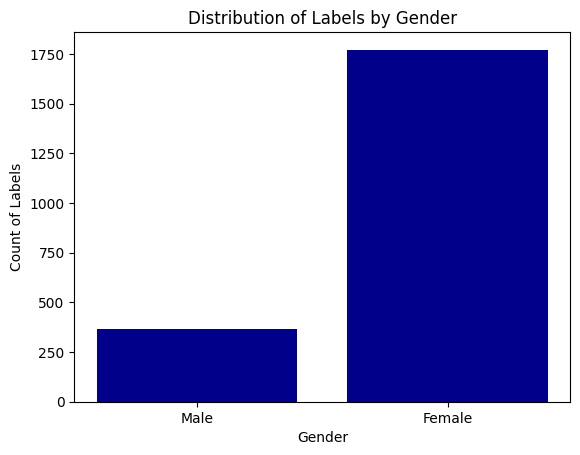

In [ ]:
# Count of labels by gender
label_counts_by_gender = df.groupby('gender')['label'].count()

# Create the bar plot
plt.bar(label_counts_by_gender.index, label_counts_by_gender.values, color=['darkblue'])
plt.xlabel("Gender")
plt.ylabel("Count of Labels")
plt.title("Distribution of Labels by Gender")
plt.xticks(ticks=range(len(label_counts_by_gender.index)), labels=['Male', 'Female'])
plt.show()

In [ ]:
# Adding a placeholder 'height' column
if 'height' not in df.columns:
    df['height'] = 1.75

# BMI calculation
df['bmi'] = df['wtkg'] / (df['height']**2)
if 'height' in df.columns:
    df['bmi'] = df['wtkg'] / (df['height']**2)
    bins = [0, 18.5, 25, 30, np.inf]
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

<ipython-input-17-8fcadb175b54>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_counts_by_bmi = df.groupby('bmi_category')['label'].count()


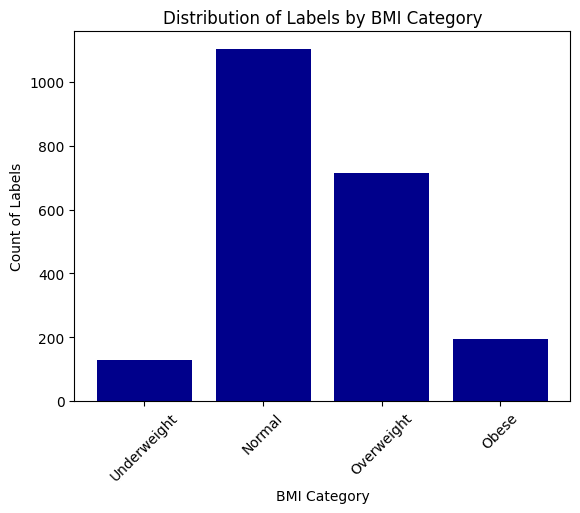

In [ ]:
# Count labels grouped by BMI categories
label_counts_by_bmi = df.groupby('bmi_category')['label'].count()

# Create the bar plot
plt.bar(label_counts_by_bmi.index, label_counts_by_bmi.values, color=['darkblue'])
plt.xlabel("BMI Category")
plt.ylabel("Count of Labels")
plt.title("Distribution of Labels by BMI Category")
plt.xticks(rotation=45)
plt.show()

FEATURE ENGINEERING

In [ ]:
# One-hot encoding for categorical variables
categorical_features = ['gender', 'race', 'age_group','bmi_category']

# Check if categorical features are present in the DataFrame
for feature in categorical_features:
    if feature not in df.columns:
        print(f"Warning: Feature '{feature}' not found in DataFrame. Creating a placeholder column with default value.")

        df[feature] = 0

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
# Drop original categorical features and merge the encoded features
df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      2139 non-null   int64  
 1   trt                       2139 non-null   int64  
 2   age                       2139 non-null   int64  
 3   wtkg                      2139 non-null   float64
 4   hemo                      2139 non-null   int64  
 5   homo                      2139 non-null   int64  
 6   drugs                     2139 non-null   int64  
 7   karnof                    2139 non-null   int64  
 8   oprior                    2139 non-null   int64  
 9   z30                       2139 non-null   int64  
 10  zprior                    2139 non-null   int64  
 11  preanti                   2139 non-null   int64  
 12  str2                      2139 non-null   int64  
 13  strat                     2139 non-null   int64  
 14  symptom 

In [ ]:
df.drop(columns=['cd4_cd8_ratio','cd4_change','cd8_change','comorbidity_score','height','bmi','gender_1','race_1','age_group_21-40',
                 'age_group_41-60','age_group_60+','bmi_category_Obese','bmi_category_Overweight','bmi_category_Underweight'], inplace=True)


DATA LABELLING

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

DATA SPLITING

In [ ]:
# Splitting the Data for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODEL BUILDING AND EVALUATION

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8271028037383178
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       327
           1       0.68      0.50      0.57       101

    accuracy                           0.83       428
   macro avg       0.77      0.71      0.73       428
weighted avg       0.82      0.83      0.82       428



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report for Decision Tree:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.8387850467289719
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       327
           1       0.69      0.58      0.63       101

    accuracy                           0.84       428
   macro avg       0.78      0.75      0.76       428
weighted avg       0.83      0.84      0.83       428



In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report for Random Forest:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8738317757009346
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       327
           1       0.81      0.61      0.70       101

    accuracy                           0.87       428
   macro avg       0.85      0.78      0.81       428
weighted avg       0.87      0.87      0.87       428



In [ ]:
# Train Gradient Boosting using XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report for XGBoost:\n", classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.866822429906542
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       327
           1       0.78      0.60      0.68       101

    accuracy                           0.87       428
   macro avg       0.83      0.78      0.80       428
weighted avg       0.86      0.87      0.86       428



In [ ]:
# Build Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the test set
nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print("Classification Report for Neural Network:\n", classification_report(y_test, nn_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5714 - loss: 56.4875
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7714 - loss: 4.3227
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8253 - loss: 1.6736
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8041 - loss: 1.3349
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7889 - loss: 1.3919
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7809 - loss: 1.4213
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7843 - loss: 1.2584
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 1.0623
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 1.0870
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.8758
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network Accuracy: 0.8200934579439252
Classification Report for Neural Network:
               precision    recal

MODEL COMPARISON

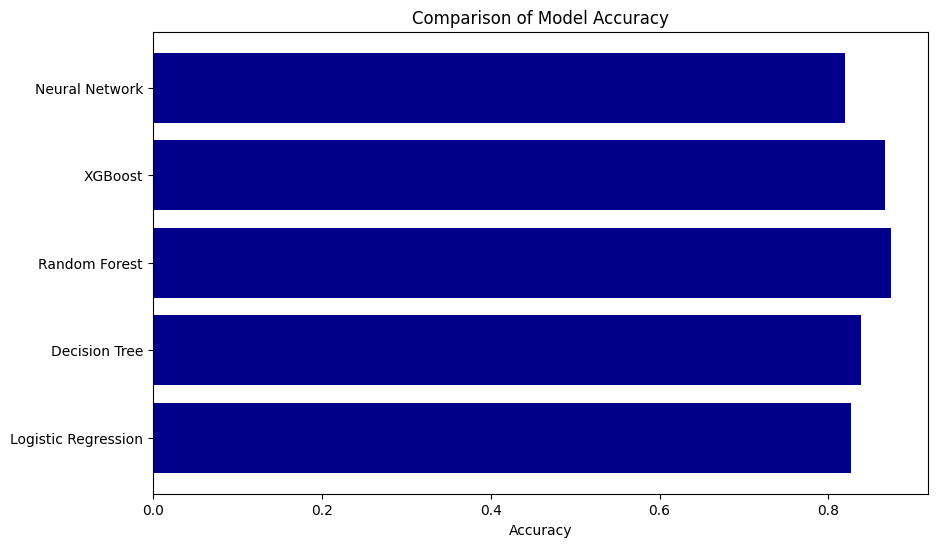

In [ ]:
# Gather accuracy of each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, nn_pred)
]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='darkblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.show()


FEATURE IMPORTANCE

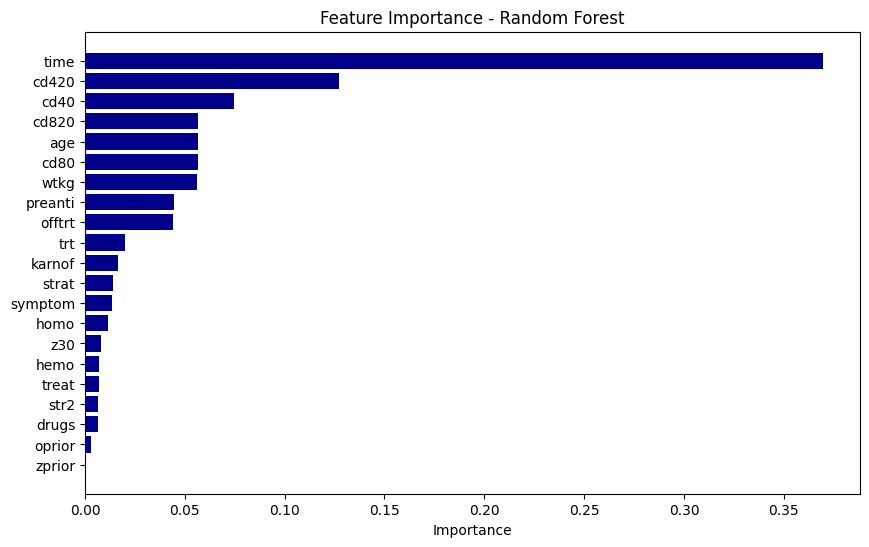

In [ ]:
# Plot the feature importance for Random Forest
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[indices], feature_importances[indices], color=['darkblue'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


MODEL INTERPRETATION

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for RandomForestClassifier
    n_estimators = trial.suggest_categorical('n_estimators', [100, 200, 300])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    # Change 'auto' to 'sqrt' for max_features
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Initialize RandomForestClassifier with the suggested hyperparameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      max_features=max_features, random_state=42)

    # Cross-validation to evaluate the performance
    score = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()
    return score

# Create Optuna study to optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", study.best_params)
print("Best Accuracy:", study.best_value)

# Use the best parameters to train the model on the full training set
best_params = study.best_params
best_rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

# Fit the best model
best_rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate performance
y_pred_best = best_rf_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

[I 2024-12-28 17:27:30,614] A new study created in memory with name: no-name-4e253fd0-40c0-4ae0-8071-4c56f50af658
[I 2024-12-28 17:27:43,468] Trial 0 finished with value: 0.8825380731455024 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8825380731455024.
[I 2024-12-28 17:27:47,635] Trial 1 finished with value: 0.8860407001157301 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.8860407001157301.
[I 2024-12-28 17:27:52,740] Trial 2 finished with value: 0.8848752061121865 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.8860407001157301.
[I 2024-12-28 17:27:55,400] Trial 3 finished with value: 0.8837045913089788 and parameters: {'n_estimators': 200, 'max_depth': No

Best Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best Accuracy: 0.8907200868487624
Best Model Accuracy: 0.8808411214953271

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       327
           1       0.83      0.62      0.71       101

    accuracy                           0.88       428
   macro avg       0.86      0.79      0.82       428
weighted avg       0.88      0.88      0.87       428



CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation score for the RandomForest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.90186916 0.85747664 0.89953271 0.90420561 0.8735363 ]
Mean Cross-Validation Score: 0.8873240823830681


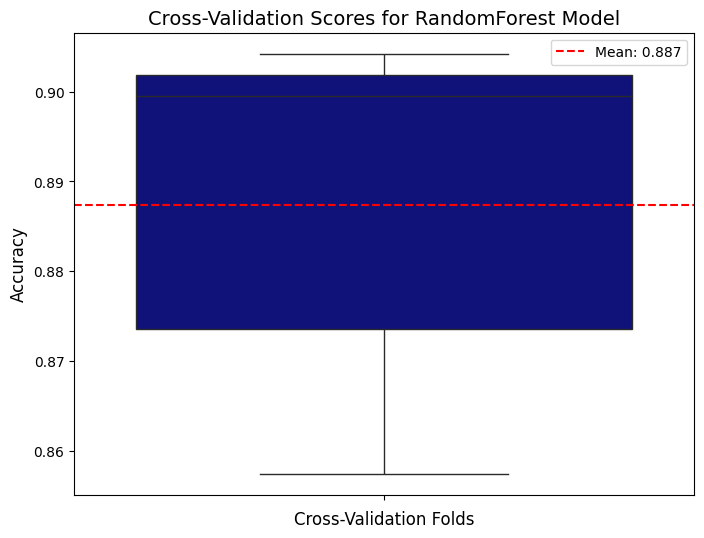

In [ ]:
# Cross-validation score for the RandomForest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Create a plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_scores, color='darkblue')

# Add the mean score as a horizontal line
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')

# Add titles and labels
plt.title('Cross-Validation Scores for RandomForest Model', fontsize=14)
plt.xlabel('Cross-Validation Folds', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Show the plot
plt.show()

CONFUSION MATRIX

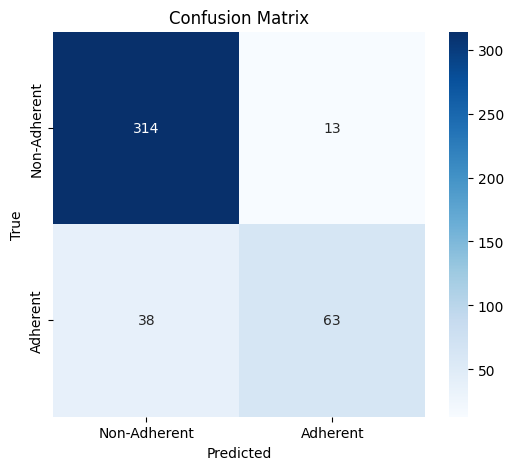

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Adherent', 'Adherent'], yticklabels=['Non-Adherent', 'Adherent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()